Question: 2
Train an SVM regressor on : Bengaluru housing dataset

    Must include in details:

  - EDA

  - Feature engineering 


Dataset : https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data?resource=download

In [1]:
# Laoding the Required Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")

# Understanding the Data

* Shape of the data : Number of rows/records and Number of Features/Columns in the dataset.
* Checking for Basic Information using data.info()
* Checking for Null Values : data.isnull().sum()
* Segregating the Numerical and Categorical data.
* Finding the mean , median of numerical values and mode of categorical values.
* Handling the Missing Values
* Checking for Duplicated Records if any.If yes then dropping it (bydefault is keeps the first and remove rest of the duplicate records)
* Checking for basic statistical description about the data (numeric (bydefault) and also it can show for categorical)
* Checking for Number of Unique Values in the each feature.
* Checking for Number of Those Unique Feature , which has values somewhere less than 10...unique values for analyse

In [3]:
print("Columns/Features of the data are :",data.columns.tolist())

Columns/Features of the data are : ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']


### Shape of the data

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Basic Information :

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### CHecking for the Null Values

In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Conclusion : We have null values in the columns size , society,bath,balcony..

In [7]:
# How much % of data has null values.???
null_counts = data.isnull().sum()
null_percentages = data.isnull().mean()
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': np.round(null_percentages,4)})


In [8]:
null_summary

,Null Count,Null Percentage
area_type,0,0.0000
availability,0,0.0000
location,1,0.0001
size,16,0.0012
society,5502,0.4131
total_sqft,0,0.0000
bath,73,0.0055
balcony,609,0.0457
price,0,0.0000


In [9]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Segregating the Numerical and Categorical Data 

In [10]:

numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(include='object').columns.tolist()

In [11]:
numeric_cols

['bath', 'balcony', 'price']

In [12]:
categorical_cols

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [13]:
numerical_data = data[numeric_cols]
categorical_data = data[categorical_cols]

In [14]:
print("Numerical Columns are :",numeric_cols)
print("Categorial COlumns are :",categorical_cols)

Numerical Columns are : ['bath', 'balcony', 'price']
Categorial COlumns are : ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']


In [15]:
numerical_data

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [16]:
categorical_data

,area_type,availability,location,size,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200
...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689


# Finding the mean , median of numerical values and mode of categorical values.

In [17]:
for col in numeric_cols:
    mean_value = data[col].mean()
    median_value = data[col].median()

    print(f"Numeric Column: {col}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print("\n")

Numeric Column: bath
Mean: 2.6926096474673513
Median: 2.0


Numeric Column: balcony
Mean: 1.5843757375501535
Median: 2.0


Numeric Column: price
Mean: 112.5656265015015
Median: 72.0




In [18]:
from statistics import mode
for col in categorical_cols:
    mode_value = data[col].mode()

    print(f"Categorical Column: {col}")
    print(f"Mode: {mode_value}")
    print("\n")

Categorical Column: area_type
Mode: 0    Super built-up  Area
Name: area_type, dtype: object


Categorical Column: availability
Mode: 0    Ready To Move
Name: availability, dtype: object


Categorical Column: location
Mode: 0    Whitefield
Name: location, dtype: object


Categorical Column: size
Mode: 0    2 BHK
Name: size, dtype: object


Categorical Column: society
Mode: 0    GrrvaGr
Name: society, dtype: object


Categorical Column: total_sqft
Mode: 0    1200
Name: total_sqft, dtype: object




COnclusion: We have not nan values in median , mean..lets impute the value of median to the nan values..in numerical data.
and mode ie. most_frequent values to the nan 

# Handling The Missing Values

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
numeric_cols

['bath', 'balcony', 'price']

In [21]:
categorical_cols

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [22]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))  # Since we have some outliers to handle
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent'))
]
                        )

In [23]:
preprocessor = ColumnTransformer(
    [
        ('Numerical_Pipeline',num_pipeline,numeric_cols),
        ('Categorical_Pipeline',cat_pipeline,categorical_cols)
    ]
)

In [24]:
preprocessor

ColumnTransformer(transformers=[('Numerical_Pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['bath', 'balcony', 'price']),
                                ('Categorical_Pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['area_type', 'availability', 'location',
                                  'size', 'society', 'total_sqft'])])

In [25]:
preprocessor.fit(data)

ColumnTransformer(transformers=[('Numerical_Pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['bath', 'balcony', 'price']),
                                ('Categorical_Pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['area_type', 'availability', 'location',
                                  'size', 'society', 'total_sqft'])])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


COnclusion : Now there is no null values present in the data

### Lets Check the Duplicate values.

In [27]:
data.duplicated().sum()

529

In [28]:
# Removing all duplicate rows
data.drop_duplicates(inplace=True)

In [29]:
# CHecking again.
data.duplicated().sum()

0

COnclusion: Now there is no Duplicate values present.

Now this is all clean dataset 

In [30]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Basic Statisitcs

In [31]:
data.describe().T  # Numerical Data Ony

,count,mean,std,min,25%,50%,75%,max
bath,12718.0,2.708602,1.357764,1.0,2.0,2.0,3.0,40.0
balcony,12186.0,1.582308,0.822536,0.0,1.0,2.0,2.0,3.0
price,12791.0,114.317646,151.480310,8.0,50.0,73.0,121.0,3600.0


In [32]:
data.describe(include='object').T  # Categorical Data Only

,count,unique,top,freq
area_type,12791,4,Super built-up Area,8317
availability,12791,81,Ready To Move,10172
location,12790,1305,Whitefield,523
size,12775,31,2 BHK,4931
society,7463,2688,GrrvaGr,68
total_sqft,12791,2117,1200,808


# Checking for Number of Unique Values in the each feature.

In [33]:
# Unique values.
for column in data.columns:
    number_of_unique_data = data[column].nunique()
    print(f"Number of Unqiue values in {column} is: {number_of_unique_data}")

Number of Unqiue values in area_type is: 4
Number of Unqiue values in availability is: 81
Number of Unqiue values in location is: 1305
Number of Unqiue values in size is: 31
Number of Unqiue values in society is: 2688
Number of Unqiue values in total_sqft is: 2117
Number of Unqiue values in bath is: 19
Number of Unqiue values in balcony is: 4
Number of Unqiue values in price is: 1994


# Checking for Number of Those Unique Feature , which has values somewhere less than 10...unique values for analyse

In [34]:
for column in data.columns:
    unique_values = data[column].unique()
    
    if len(unique_values) < 10:
        print(f"\nColumn: {column}")
        print("Unique Values:")
        print(unique_values)


Column: area_type
Unique Values:
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

Column: balcony
Unique Values:
[ 1.  3. nan  2.  0.]


----------------------------------

# EDA

In [35]:
df = data

In [36]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [37]:
# Univariate analysis

In [38]:
numeric_cols

['bath', 'balcony', 'price']

In [39]:
categorical_cols

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [40]:
for column in numeric_cols:
    print(f'\nValue Counts for {column}:\n{df[column].value_counts()}\n{"-"*40}')


Value Counts for bath:
bath
2.0     6546
3.0     3180
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64
----------------------------------------

Value Counts for balcony:
balcony
2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: count, dtype: int64
----------------------------------------

Value Counts for price:
price
75.00     300
65.00     296
55.00     265
60.00     263
45.00     231
         ... 
40.98       1
27.54       1
84.95       1
63.98       1
488.00      1
Name: count, Length: 1994, dtype: int64
----------------------------------------


In [41]:
for column in categorical_cols:
    print(f'\nValue Counts for {column}:\n{df[column].value_counts()}\n{"-"*40}')


Value Counts for area_type:
area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64
----------------------------------------

Value Counts for availability:
availability
Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: count, Length: 81, dtype: int64
----------------------------------------

Value Counts for location:
location
Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise    

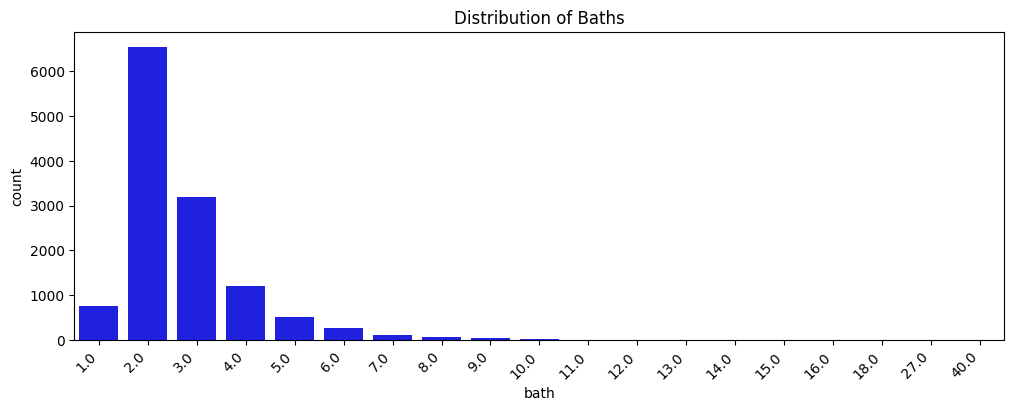

In [42]:
# Bar plot for 'bath'
plt.figure(figsize=(12,4))
sns.countplot(x='bath', data=df,color='blue')
plt.title('Distribution of Baths')
plt.xticks(rotation=45, ha='right') 
plt.show()

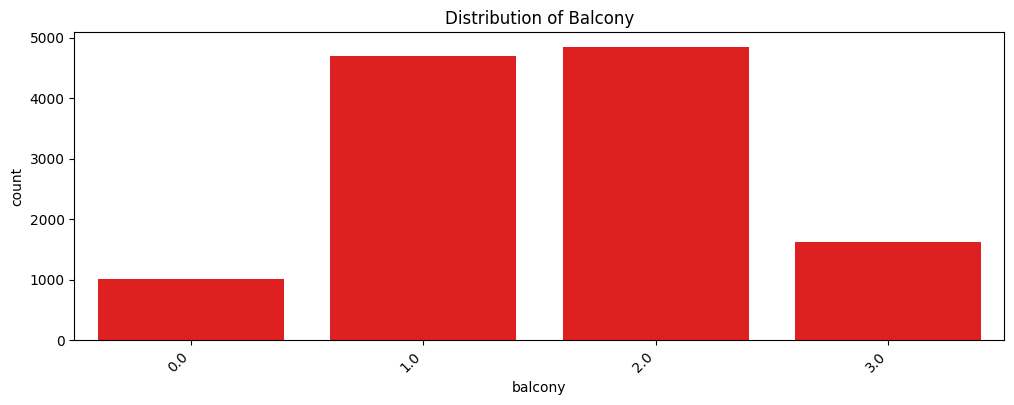

In [43]:
# Bar plot for 'balcony'
plt.figure(figsize=(12,4))
sns.countplot(x='balcony', data=df,color='red')
plt.title('Distribution of Balcony')
plt.xticks(rotation=45, ha='right') 
plt.show()

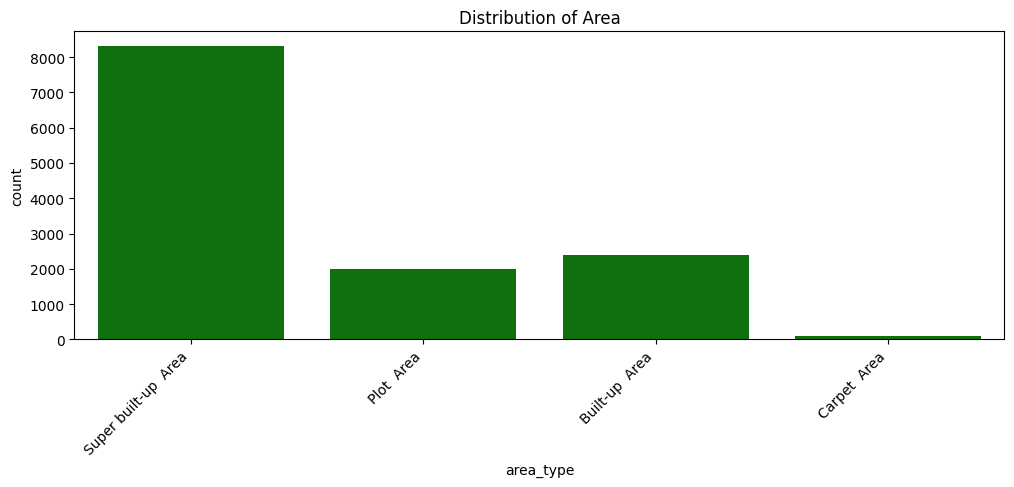

In [44]:
# Bar plot for 'area_type'
plt.figure(figsize=(12,4))
sns.countplot(x='area_type', data=df,color='green')
plt.title('Distribution of Area')
plt.xticks(rotation=45, ha='right') 
plt.show()

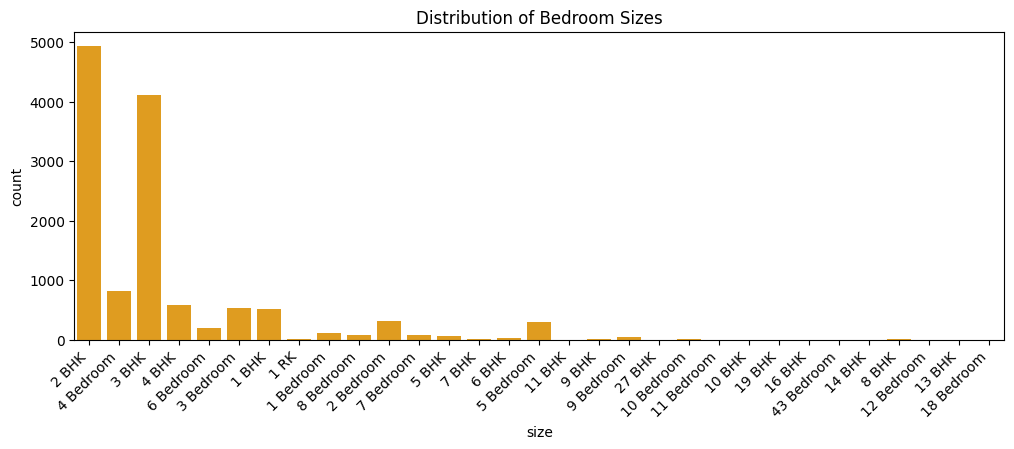

In [45]:
# Bar plot for 'size'
plt.figure(figsize=(12,4))
sns.countplot(x='size', data=df,color='orange')
plt.title('Distribution of Bedroom Sizes')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [46]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


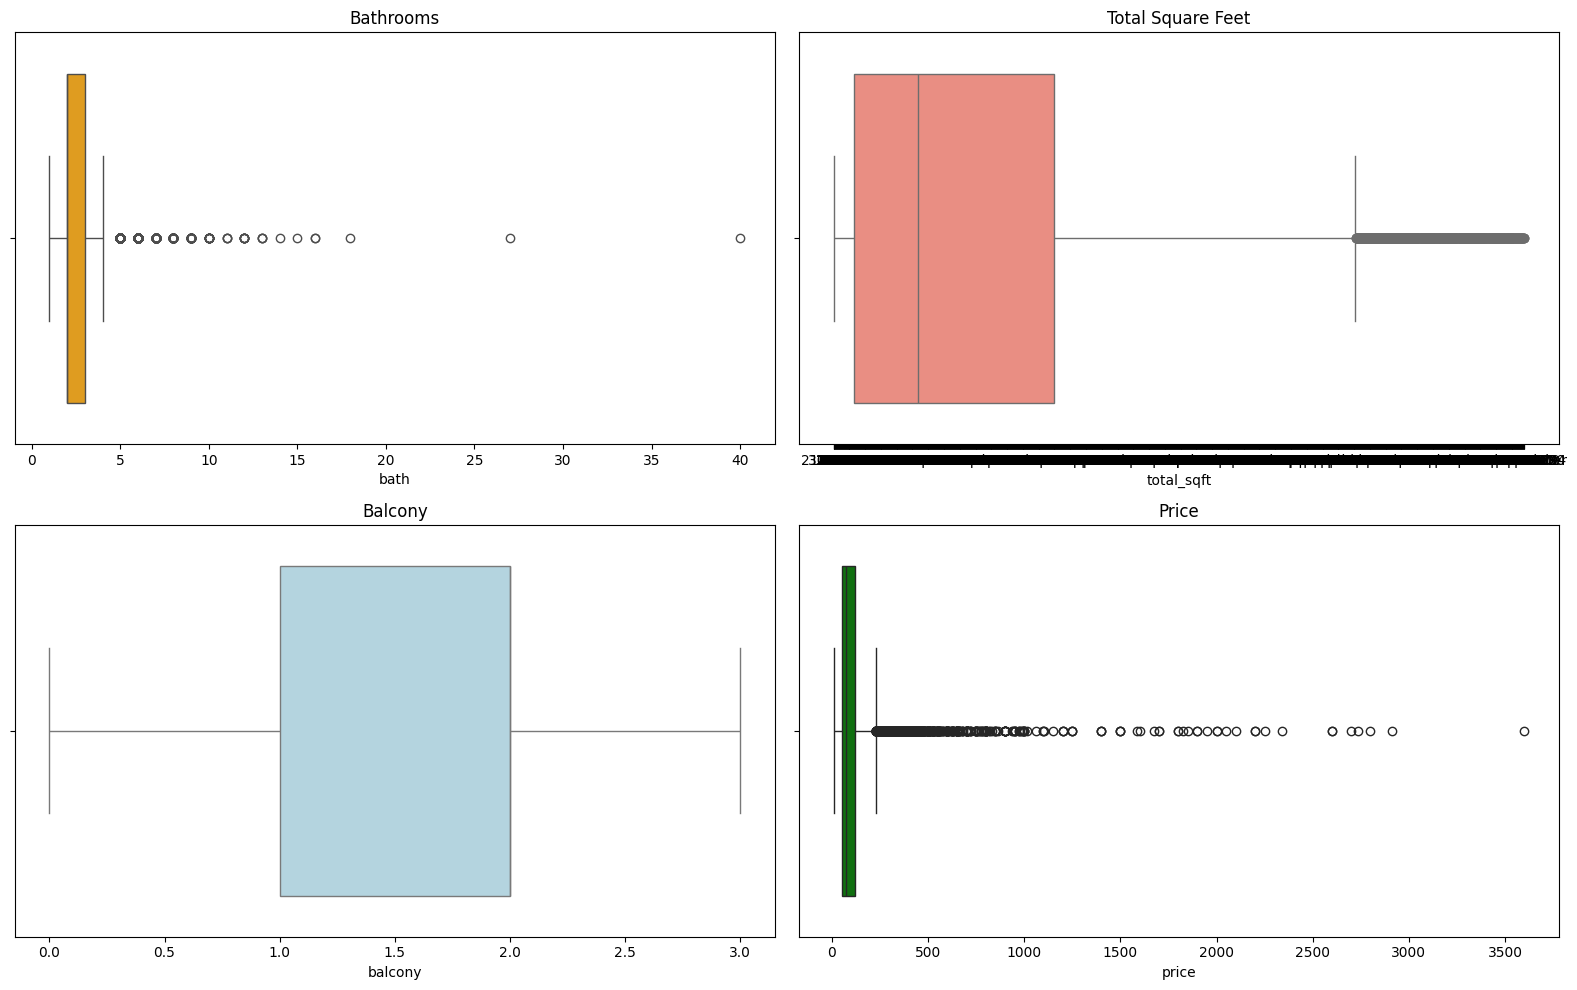

In [47]:
plt.figure(figsize=(16, 10))

# Subplot 1 - Bathrooms
plt.subplot(2, 2, 1)
sns.boxplot(x=data['bath'], color='orange')
plt.title('Bathrooms')

# Subplot 2 - Total Square Feet
plt.subplot(2, 2, 2)
sns.boxplot(x=data['total_sqft'], color='salmon')
plt.title('Total Square Feet')

# Subplot 3 - Balcony
plt.subplot(2, 2, 3)
sns.boxplot(x=data['balcony'], color='lightblue')
plt.title('Balcony')

# Subplot 4 - Price
plt.subplot(2, 2, 4)
sns.boxplot(x=data['price'], color='green')
plt.title('Price')

plt.tight_layout()

plt.show()



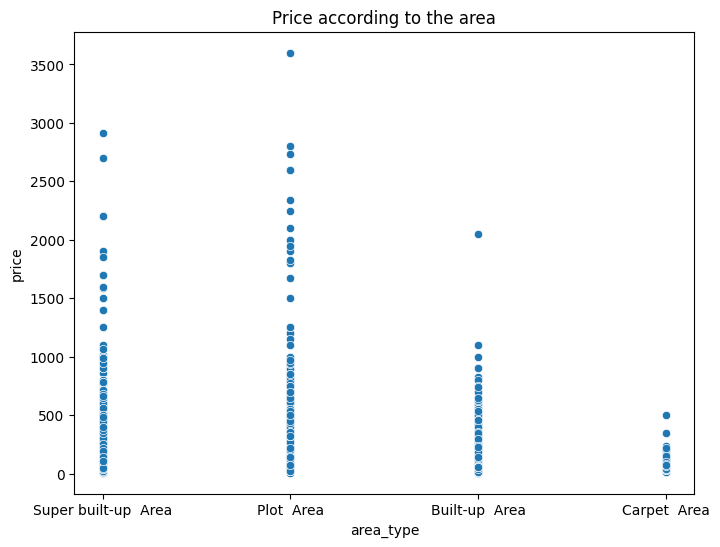

In [48]:
# Bivariate Analysis
# Scatter plot are_type and price.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area_type', y='price', data=df)
plt.title('Price according to the area')
plt.show()

<Axes: xlabel='area_type', ylabel='price'>

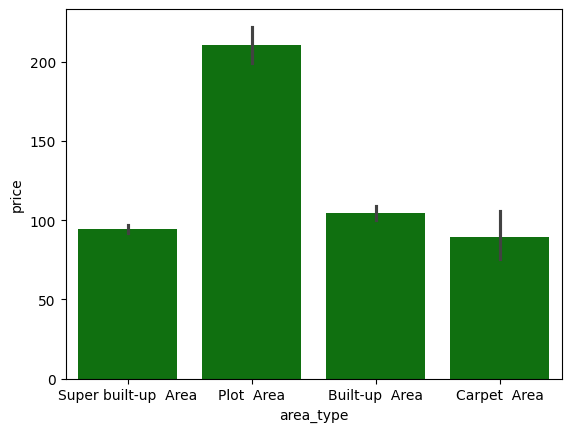

In [49]:
sns.barplot(x=df['area_type'],y=df['price'],color='green')

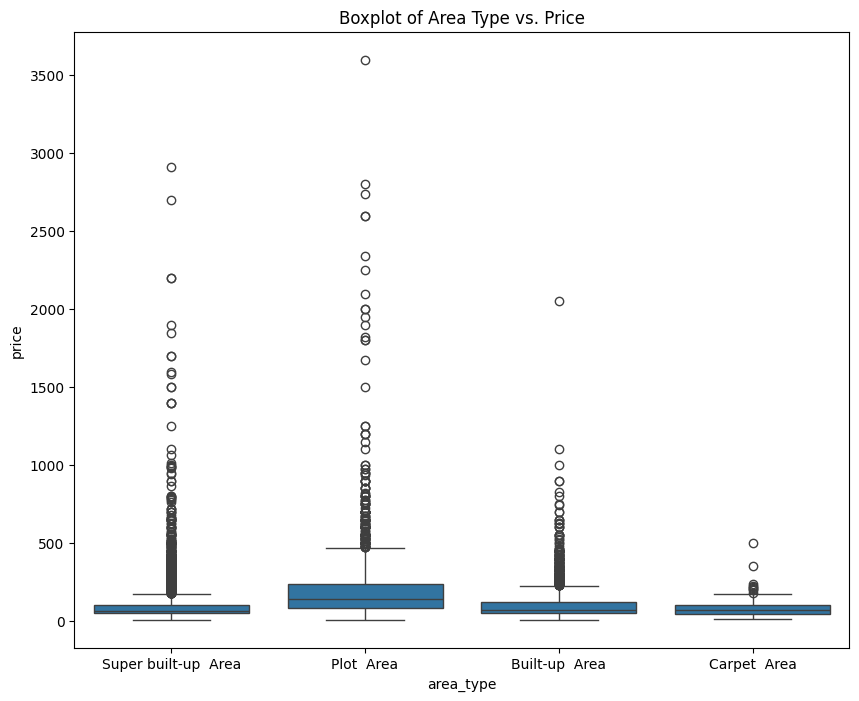

In [50]:
# Boxplot for categorical variable 'area_type' vs. 'price'
plt.figure(figsize=(10, 8))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('Boxplot of Area Type vs. Price')
plt.show()

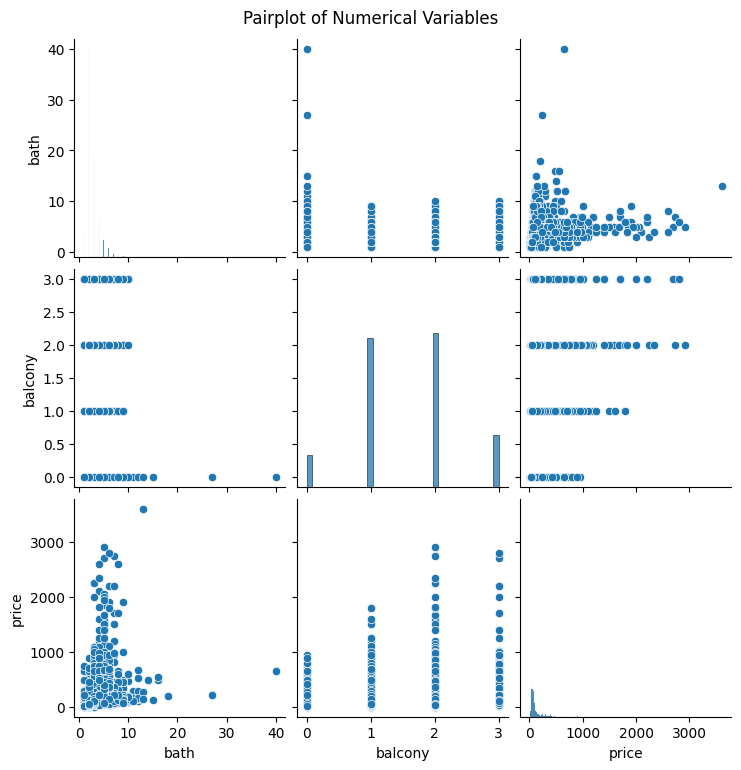

In [51]:
# Multivariate Analysis
# Pairplot for numerical variables
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

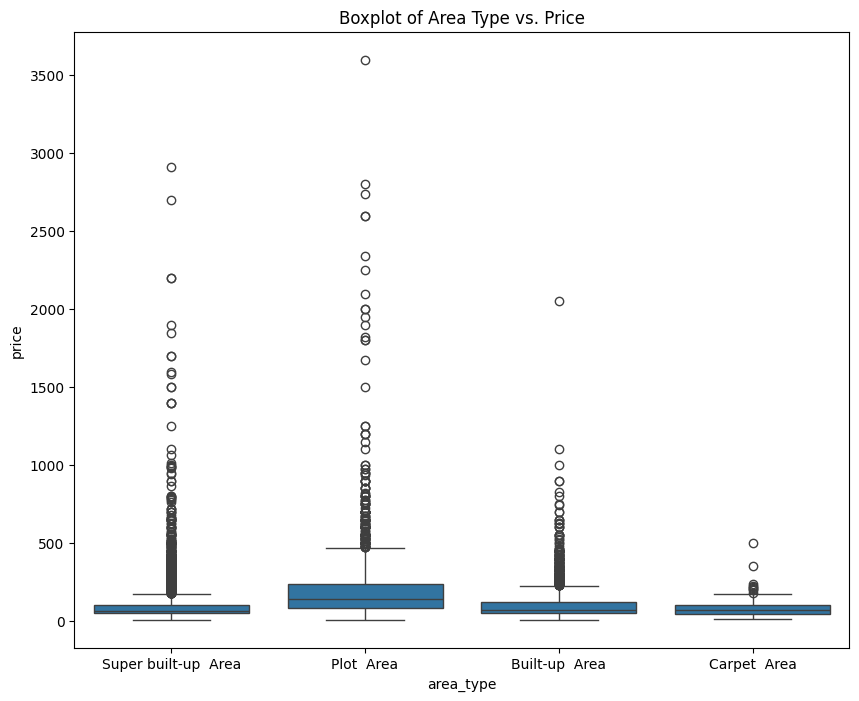

In [52]:
# Boxplot for categorical variable 'area_type' vs. 'price'
plt.figure(figsize=(10, 8))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('Boxplot of Area Type vs. Price')
plt.show()

In [53]:
data   # Lets Converting the data using scaling..

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [55]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [56]:
# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [57]:
X.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0


In [58]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [59]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

In [62]:
numerical_features

['bath', 'balcony']

In [63]:
categorical_features

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [64]:
# Sicne we have already handled the missing values...But lets do it for understanding...handling incoming data.

In [65]:
# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [66]:
# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [67]:
# Creating MOdel
regressor = SVR()

In [68]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', regressor)])

In [69]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__kernel': ['linear', 'rbf']
}


In [70]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [71]:
# Fit the model
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bath',
                                                                          'balcony']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['area_type',
                                                                          'availability',
                                                                          'location',
                                                                          'size',
                                                                          'society',
                                                                          'total_sqft'])])),
                                       ('regressor', SVR())]),
             param_grid={'regressor__C': [0.1, 1, 10],
                         'regressor__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [72]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bath',
                                                                          'balcony']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['area_type',
                                                                          'availability',
                                                                          'location',
                                                                          'size',
                                                                          'society',
                                                                          'total_sqft'])])),
                                       ('regressor', SVR())]),
             param_grid={'regressor__C': [0.1, 1, 10],
                         'regressor__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [73]:
# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'regressor__C': 10, 'regressor__kernel': 'linear'}


In [74]:
# Make predictions on the test set
y_pred = grid_search.predict(X_test)

In [75]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')




Mean Squared Error on Test Set: 14391.680193273105
